In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.distributions.empirical_distribution import ECDF
from statsmodels.graphics.tsaplots import plot_acf
from sklearn.utils import shuffle
import warnings
warnings.filterwarnings('ignore')
from termcolor import colored
# from scipy.stats import norm

In [ ]:
from google.colab import files
import os
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [ ]:
plt.rcParams["figure.figsize"] = (10,5)

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# GSPC.csv:
# https://drive.google.com/open?id=1SD2oWqwoDhN8_8thFFc2FUuhxzfw3p7L
filename = 'GSPCv2.csv'
id = '1SD2oWqwoDhN8_8thFFc2FUuhxzfw3p7L'
drive.CreateFile({'id': id}).GetContentFile(filename)
data = pd.read_csv(filename, header=0, sep=',', error_bad_lines=False)

# Poloniex_BTCUSD_d.csv:
# source: https://www.cryptodatadownload.com/data/poloniex/
# https://drive.google.com/open?id=1NFKIi0ltn-2ALHwkrKFHdscK89D0t2BZ
id = '1NFKIi0ltn-2ALHwkrKFHdscK89D0t2BZ'
filename = 'Poloniex_BTCUSD_d.csv'
download = drive.CreateFile({'id': id}).GetContentFile(filename)
data2 = pd.read_csv(filename, header=0, sep=',', error_bad_lines=False)

### <center> Generating normally distributed data. </center>

In [ ]:
random_series = np.random.normal(loc=2.3, scale=1.8, size=len(data))

### <center> Brief look at the data. </center>

In [ ]:
def plot_and_hist(data: pd.Series) -> None:
  data.plot()
  plt.show()
  data.hist(bins=100) # or Sturge’s Rule int(1 + 3.322 * log10(n))
  plt.show()

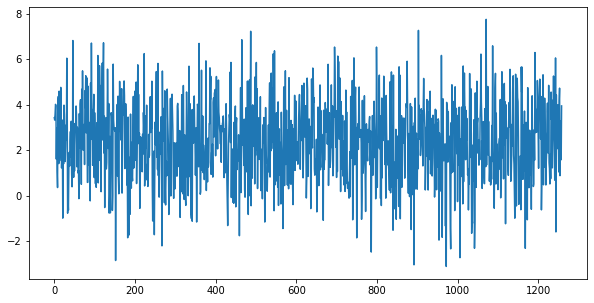

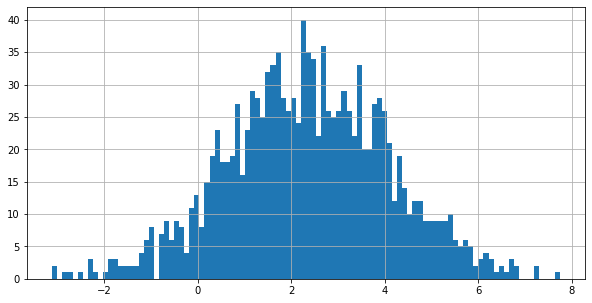

In [ ]:
random_series = pd.Series(random_series)
plot_and_hist(random_series) # plot and histogram of data before standarization

In [ ]:
random_series = (random_series - random_series.mean()) / random_series.std() # standarization of data

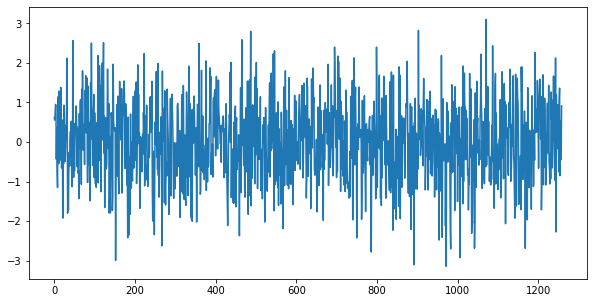

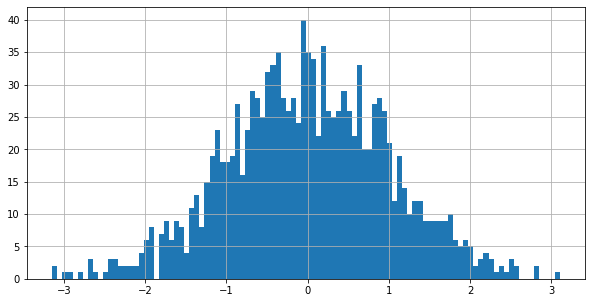

In [ ]:
plot_and_hist(random_series) # plot and histogram of data after standarization

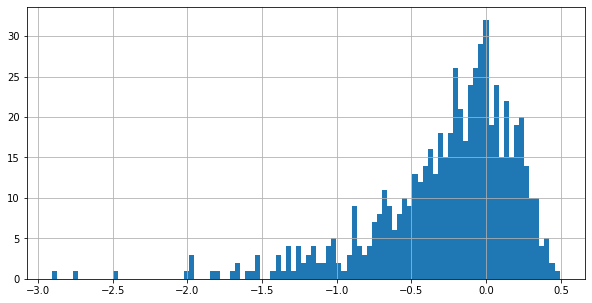

In [ ]:
np.log10(random_series).hist(bins=100) # histogram of data in log scale

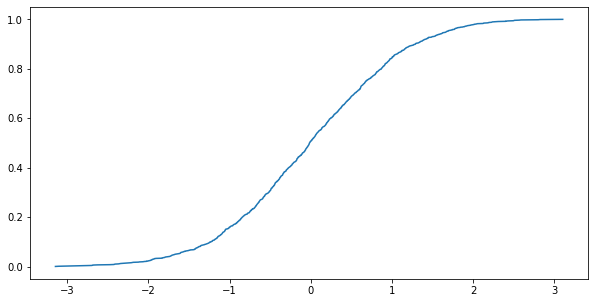

In [ ]:
ecdf = ECDF(random_series) # ecdf - empirical cumulative distribution function - empiryczna dystrybuanta
plt.plot(ecdf.x, ecdf.y)
plt.show()

### <center> Analysis of stock exchange data distribution (data downloaded from https://finance.yahoo.com). </center>

In [ ]:
def printc(string: str) -> None:
  print(colored('\n' + string + '\n', 'magenta', 'on_grey', ['dark']))

In [ ]:
# for later comparison
def plot_hists(fluct: pd.Series, random_series: pd.Series) -> None:
    # we use histogram as non-parametric estimator of ditribution
    random_series.hist(bins=100)
    fluct.hist(bins=100, fc=(1, 0, 0, 0.5))
    labels= ["random_series","fluctuations"]
    plt.legend(labels)
    plt.show()

def comparison(fluct: pd.Series, random_series: pd.Series) -> None:
  plot_hists(fluct, random_series)
  plot_hists(np.log10(fluct), np.log10(random_series))

In [ ]:
def analyze_stock_data(data: pd.DataFrame) -> pd.Series:
  printc('Stock data:')
  data['Close'].plot()
  plt.show()

  fluct = np.diff(data['Close'], n=1) # difference with step n=1
  fluct = pd.Series(fluct)

  printc('Fluctuations of stock data before standarization:')
  plot_and_hist(fluct) # before standarization
  fluct = (fluct - fluct.mean()) / fluct.std() # standarization of data
  printc('Fluctuations of stock data after standarization:')
  plot_and_hist(fluct)# after standarization

  printc("Histogram of fluctuations in log scale:")
  np.log10(fluct).hist(bins=100) # histogram of data in log scale
  plt.show()

  printc("Empirical CDF of fluctuations:")
  ecdf = ECDF(fluct) # ecdf
  plt.plot(ecdf.x, ecdf.y)
  plt.show()

  return fluct


Stock data:



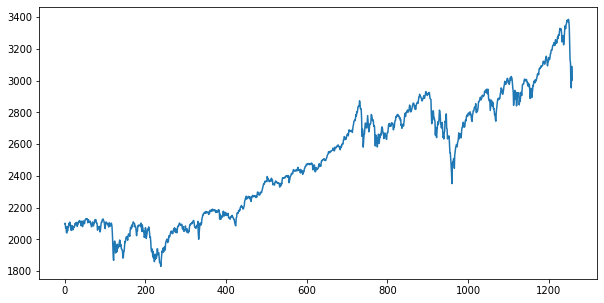


Fluctuations of stock data before standarization:



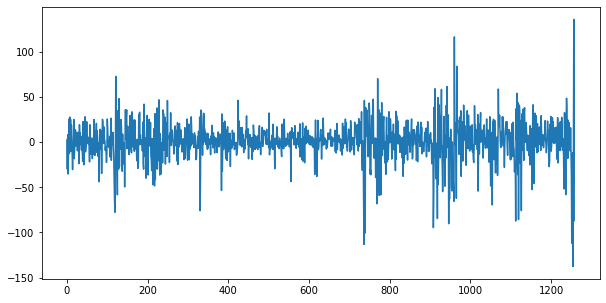

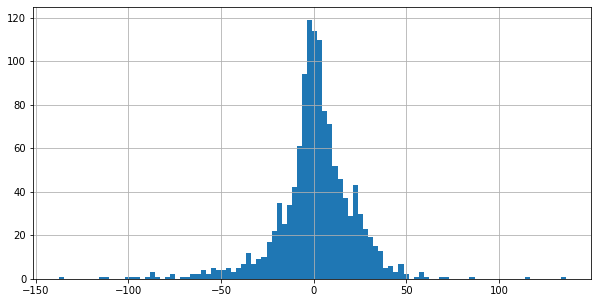


Fluctuations of stock data after standarization:



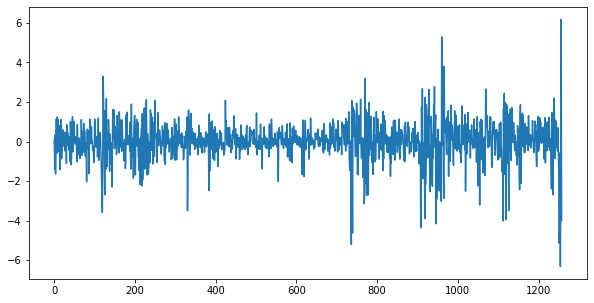

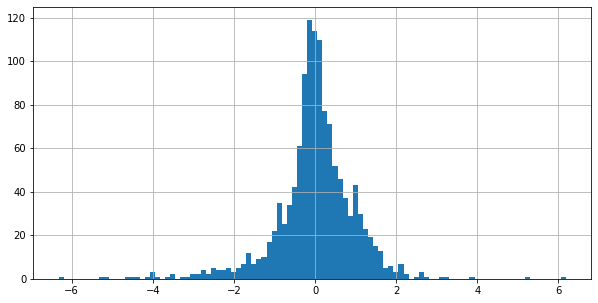


Histogram of fluctuations in log scale:



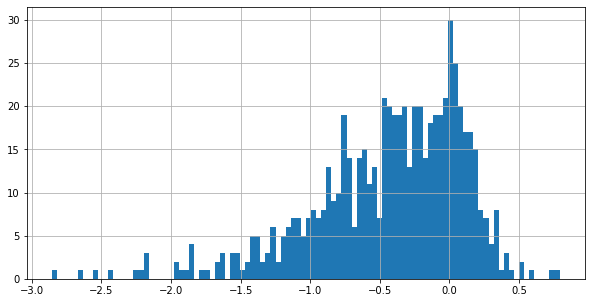


Empirical CDF of fluctuations:



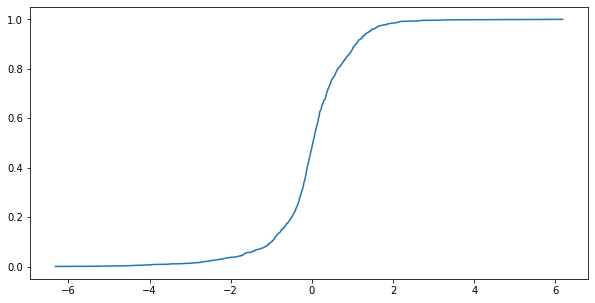


Comparison between fluctuations and randomly sampled data:



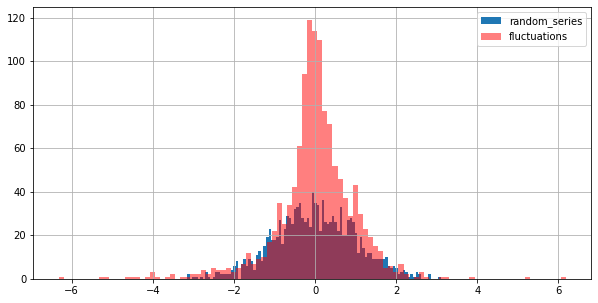

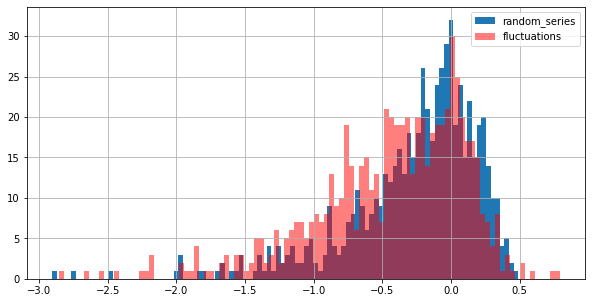

In [ ]:
fluct = analyze_stock_data(data)
printc("Comparison between fluctuations and randomly sampled data:")
comparison(fluct, random_series)

### <center> 1. Cryptocurrency - http://api.bitcoincharts.com/v1/csv/ (bitcoin) or https://www.cryptodatadownload.com/data/. </center>

### <center> 2. Distribution analysis </center>


Stock data:



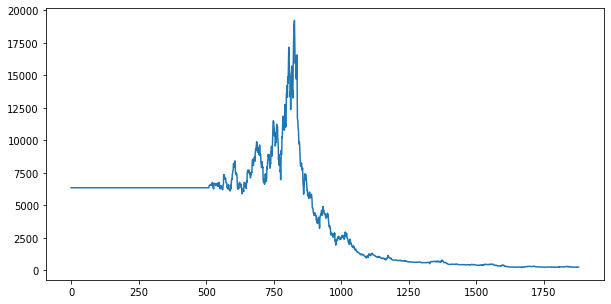


Fluctuations of stock data before standarization:



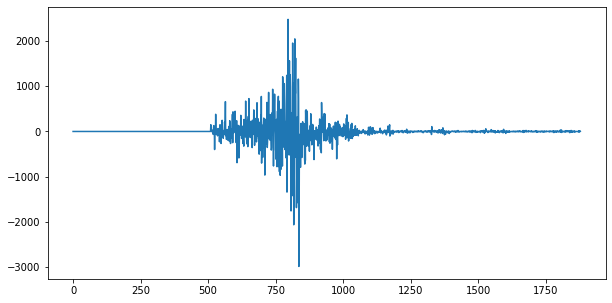

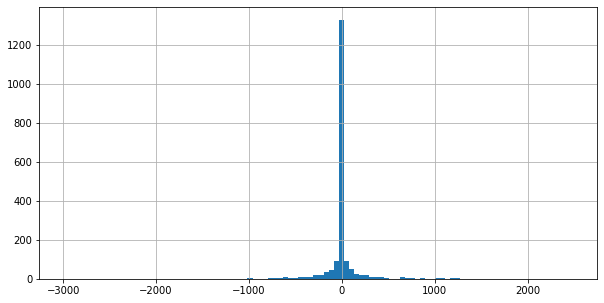


Fluctuations of stock data after standarization:



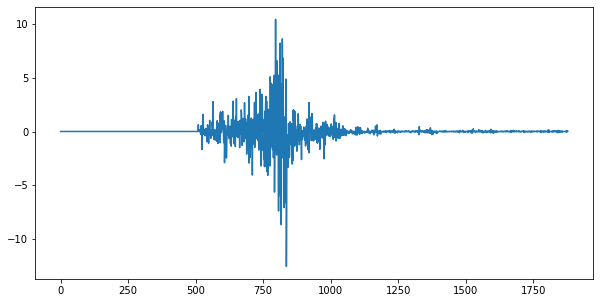

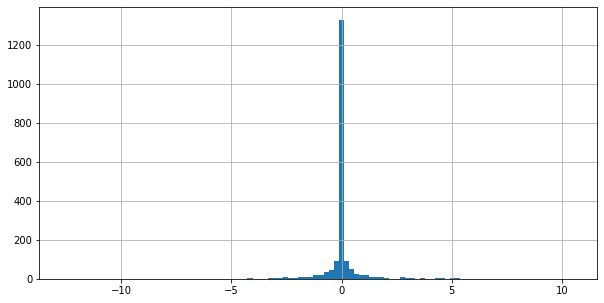


Histogram of fluctuations in log scale:



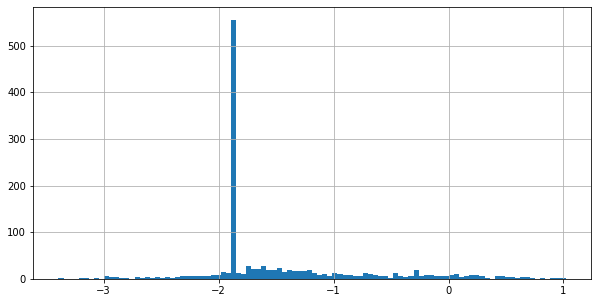


Empirical CDF of fluctuations:



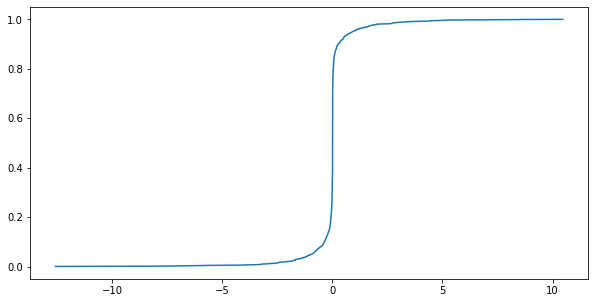

In [ ]:
fluct = analyze_stock_data(data2)

#### Usually log scale should give us a histogram where number of observations that was previously standing out is now 'squashed' a bit, more so than other numbers (like it is with first data), but since the fluctuations in our data were so high at some point, it did not make that much of a difference.

### <center> 1. Autocorrelation function </center>





In [ ]:
# for convertion purposes we drop columns that cannot be converted
# we do not use those columns anyway
data = data.drop('Date', axis=1)
data2 = data2.drop(['Symbol', 'Date'], axis=1)

In [ ]:
def plot_all(df1: pd.DataFrame, df2: pd.DataFrame, df3: pd.DataFrame) -> None:
    plot_acf(df1)
    plot_acf(df2)
    plot_acf(df3)
    plt.show()

In [ ]:
series = np.random.normal(loc=2.3, scale=1.8, size=max(len(data), len(data2)))
df = pd.DataFrame(data=series)


Autocorrelation of random series, stock and cryptocurrency



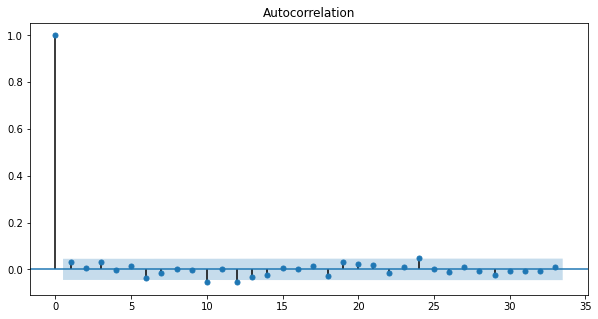

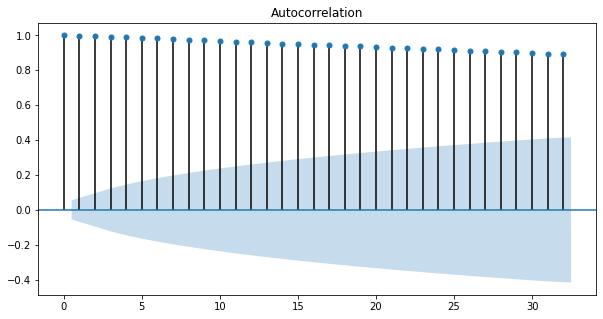

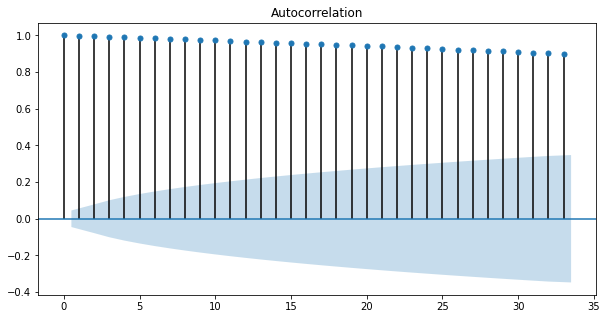


Autocorrelation of transformed (squared) data



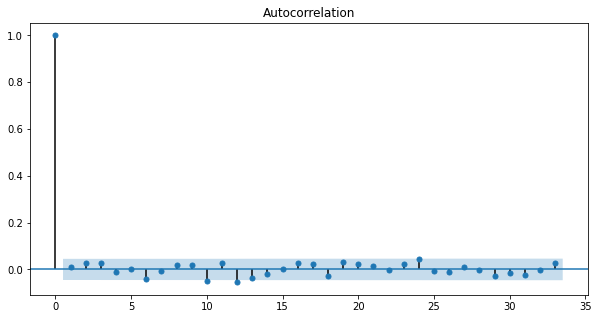

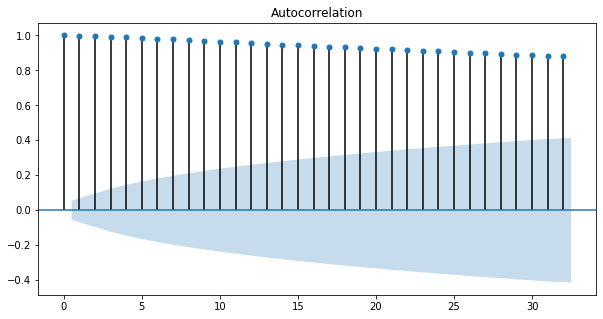

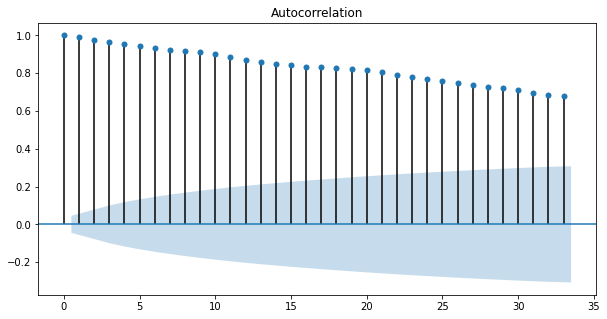

In [ ]:
printc('Autocorrelation of random series, stock and cryptocurrency')
plot_all(df, data['Close'], data2['Close'])
printc('Autocorrelation of transformed (squared) data')
plot_all(np.square(df), np.square(data['Close']), np.square(data2['Close']))


Autocorrelation of shuffled data



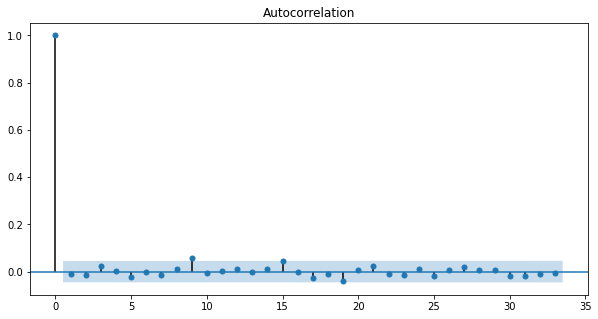

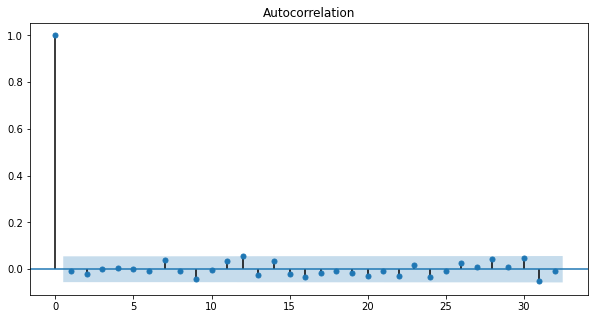

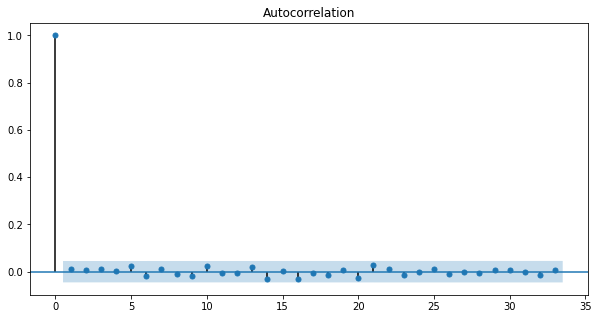

In [ ]:
printc('Autocorrelation of shuffled data')
plot_all(shuffle(df), shuffle(data['Close']), shuffle(data2['Close']))

The autocorrelation coefficient lies on y axis. The x axis spans number of time observations (time steps) by which the series is shifted. Looking at plots 2, 3 and 5, 6 we can observe, that the more our series is shifted in time, the less correlated it is with the original series, starting with autocorrelation equal to 1 with no shift (obviously). The blue cone informs us about the confidence interval for particular autocorrelation coefficient. Coefficients (or lines) above or below the cone are significant (the closed value is correlated to time). 

We can see slight but negligable differences between our raw data, and our transformed data (squared). This is good, because it means we can transform our data, probably in many different ways, and not lose the property of autocorrelation.

Looking at every single plot of our random series we can definitely tell, that it is not autocorrelated in time, which is expected, because normal distribution does not show any periodic behavior.

Finally looking at last three plots we can conclude, that once the data is shuffled it loses the property of autocorrelation in time.